<a href="https://colab.research.google.com/github/anishmahapatra/amazon-customer-review-nlp/blob/main/NLP_Amazon_Customer_Review_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing (NLP): Consumer Reviews of Amazon Products

*Date: 01st May, 2020 <br/>
Author: AM, PQ* 

Welcome to this Collaboratory Notebook. We shall use this notebook to the Fundamentals of the Natural Language Processing (NLP). Remember, the best way to learn Data Science is to simply <b>do it.</b> Crack your fingers, it's going to be a fun notebook. 

<b>Aim:</b> <br/>The purpose of this notebook is to understand the fundamentals of Natural Language Processing [Consumer Reviews of Amazon Products](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products).

The Lending Club Dataset has been pulled from the LendingClub Website. The level of the Data is at a <b>Customer Id</b> Level.



<a name="0"></a>
## Table of Contents

1 [Understanding the Data](#1) <br/>
2 [SpaCy](#2) <br/>
3 [Word2Vec](#3) <br/>
4 [NGram](#4) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1 [](#5.1) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2 [](#5.1) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.3 [](#6) <br/>
7 [MLflow](#7) <br/>

<a name="1"></a>
## 1 Understanding the Dataset
Back to [Table of Contents](#0)

---

For this section, we shall install do the following:
- Install the required packages
- Import the required packages
- Read the Zomato data onto [Google Colab](https://research.google.com/colaboratory/faq.html) from a [GitHub Repository](https://www.youtube.com/watch?v=w3jLJU7DT5E)
- Read the Amazon Dataset onto Google Colab


In [11]:
# Installing the required packages

! pip uninstall -y pandas-profiling &> /dev/null                # Package for pandas profiling - visualization
! pip install pandas-profiling[notebook,html] &> /dev/null      # Uninstalling and reinstalling it due to a bug in Google Colab
! pip install sweetviz &> /dev/null                             # Package for some sweet visualizations
! pip install -U dataprep &> /dev/null                          # Package for instant data preparation
! pip install --upgrade plotly &> /dev/null                     # Updating plotly to the latest version
! pip install jupyter-dash &> /dev/null                         # Installing jupyter-dash 

In [12]:
# Let us import the required packages

from dash.dependencies import Input, Output
from pandas_profiling import ProfileReport          # Pandas Profile to visualize the data
from dataprep.eda import plot_correlation           # Importing a package to visualize data correlation
from dataprep.eda import plot_missing               # Importing packge to plot the missing values of the dataset
from jupyter_dash import JupyterDash                # Importing Jupter Dash to use visualization components 

from IPython.display import display                 # Displaying widgets
import dash_html_components as html                 # To leverage html components in the visualization
import dash_core_components as dcc                  # Importing dash core components for visualization
import matplotlib.ticker as ticker                  # User-defined function for formatting graphs
import plotly.graph_objects as go                   # To use graph objects within visualizations

from plotly.offline import iplot                    # Used for interactive plots
import matplotlib.pyplot as plt                     # Importing matplotlib for visualization
from dataprep.eda import plot                       # Importing package to plot/ visualize features of the dataset
import ipywidgets as widgets                        # Creating widgets
import plotly.express as px                         # Importing plotly express for visualizations
import matplotlib.cm as cm                          # Colormaps, colormaps handling utilities

import pandas_profiling                             # Automatic EDA
import sweetviz as sv                               # Importing sweetviz for some sweet visualizations
import seaborn as sns                               # Importing seaborn for visualization
import pandas as pd                                 # Importing pandas
import numpy as np                                  # Importing numpy
%matplotlib inline    
import warnings                                     # Importing package to toggle warnings
import IPython                                      # Importing ipython for displaying html files in the notebook

# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Hide Warnings
warnings.filterwarnings('ignore')

In [13]:
# Reading the file onto Google Colab from GitHub using pandas library
reviewDf = pd.read_csv("https://raw.githubusercontent.com/anishmahapatra/amazon-customer-review-nlp/main/Amazon%20Customer%20Review.csv")    # Reading file zomato.csv

In [14]:
# Viewing the shape of the data
reviewDf.shape

(34660, 21)

In [15]:
# Viewing the top 5 rows of the dataset
reviewDf.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


From the above, we understand that the table has data on the consumer data from amazon such as name, category, brand and review information such as date, purchase information, rating, city and username



In [16]:
# Let's view a summary of the dataset now
print(reviewDf.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

The data set has the following:
- 6 variables of type float
- 16 categorical variables
- 34660 rows
- 21 columns

In [17]:
# Printing all the columns with atleast one null value
reviewDf.columns[reviewDf.isna().any()].tolist()

['name',
 'asins',
 'reviews.date',
 'reviews.dateAdded',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.text',
 'reviews.title',
 'reviews.userCity',
 'reviews.userProvince',
 'reviews.username']

There are 14 columns out of the 21 that have missing values

<a name="1.1"></a>
### 1.1 Exploratory Data Analysis (EDA)
Back to [Table of Contents](#0)

Now that we have some basic data understanding of the data we are dealing with, it's time to try and understand things a little more in details. We will proceed to <b>analyze and explore the data</b>. There is a common term in the Data Science community that we use to describe this: <u>Exploratory Data Analysis</u> (<b>[EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)</b>).</n>


Exploratory Data Analysis is used to get a <i>feel</i> of the data. We use it to understand the attributes, gaps and behaviour that the data has. A traditional way of doing it can be looking at the data column by column, row by row. As more developers contribute to the open-source python ecosystem, we have great packages that can help us analyze the data with minimal effort.


<a name="1.1.1"></a>
#### 1.1.1 Pandas Profiling
---

Back to [Table of Contents](#0)

The [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling) package is used to generate profile report from a pandas dataframe. It gives column statistics on all of the columns in an interactive format that you can find below.

Since we have one primary dataset, let us make a copy of the dataset as *df* to be able to reuse the code later for any general dataset as well.

In [18]:
# Making a copy of the dataset as df
df = reviewDf.copy(deep = True)

In [19]:
# Generating the profile report and feeding it into a variable
reviewPandasProfile = ProfileReport(df, title = 'Amazon Consumer Review Data: Pandas Profiling Report', html = {'style':{'full_width':True}})

In [20]:
# Showcasing the Pandas Profiling Report for the Zomato Dataset
reviewPandasProfile

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a name="1.1.2"></a>
#### 1.1.2 Sweetviz

Back to [Table of Contents](#0)

The [SweetViz](https://pypi.org/project/sweetviz/) package is a pandas-based library to visualize and compare datsets. <br/>
It is used for in-depth EDA to generate beautiful, high-density visualizations. 

In [21]:
# We shall use the SweetViz analyze() function to generate a shareable .html file to analyze the dataset
analyze_report = sv.analyze(df)
analyze_report.show_html('SweetViz.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report SweetViz.html was generated.



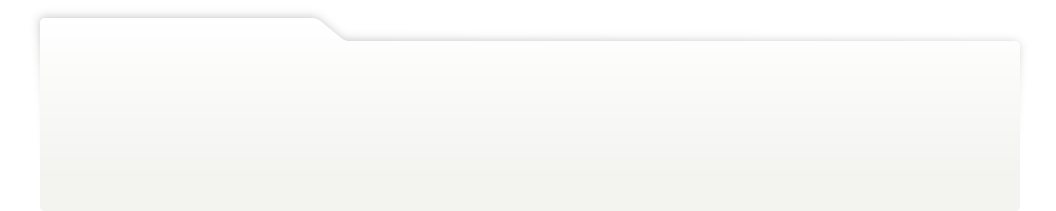
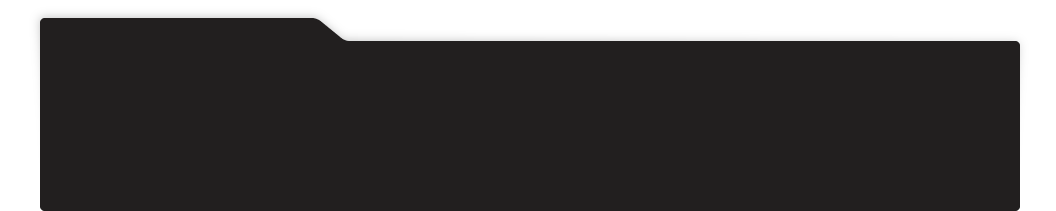
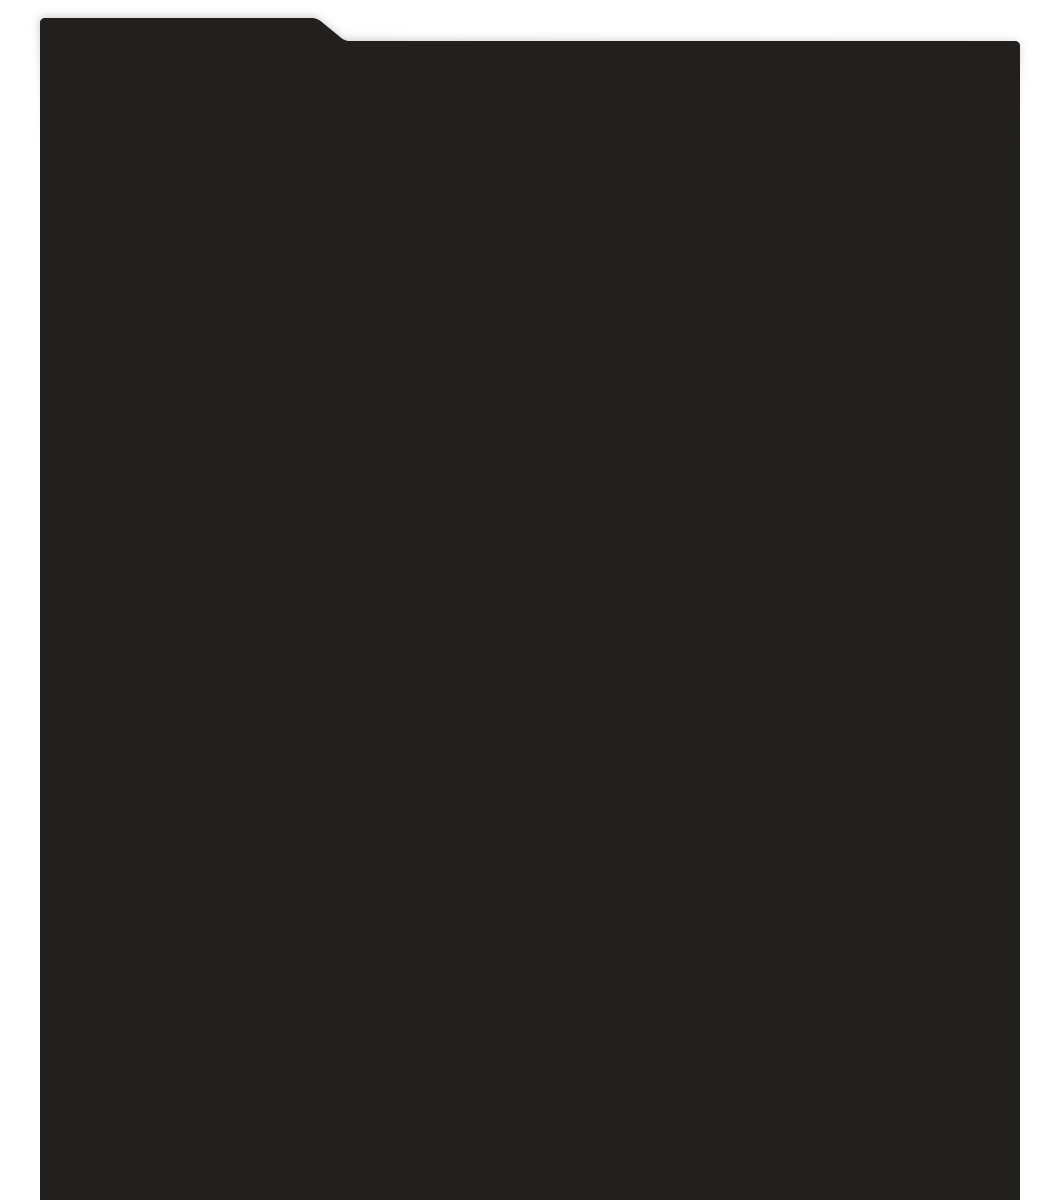
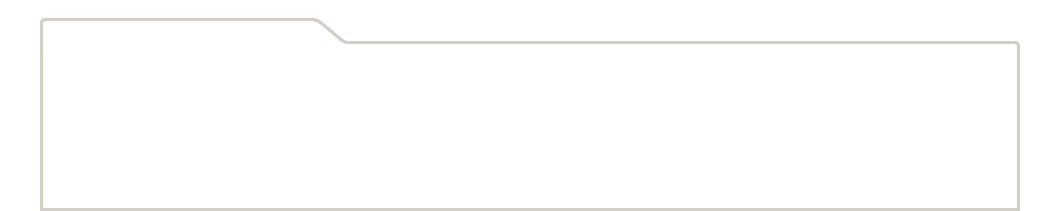
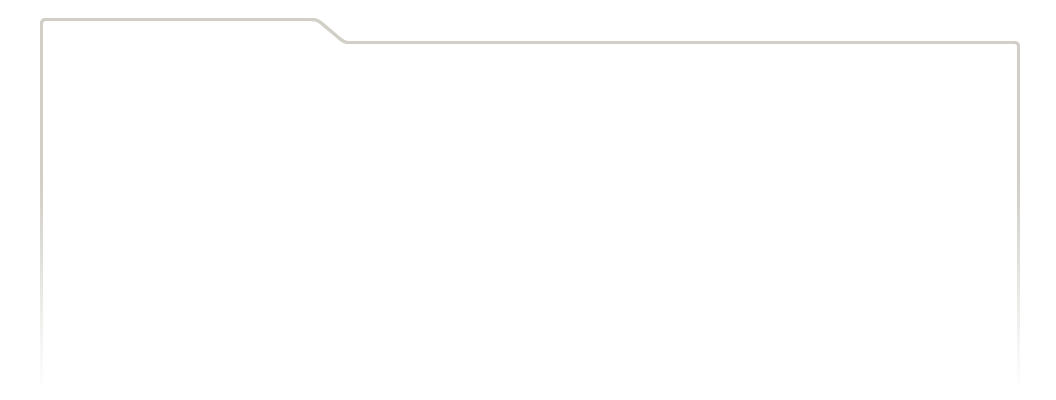
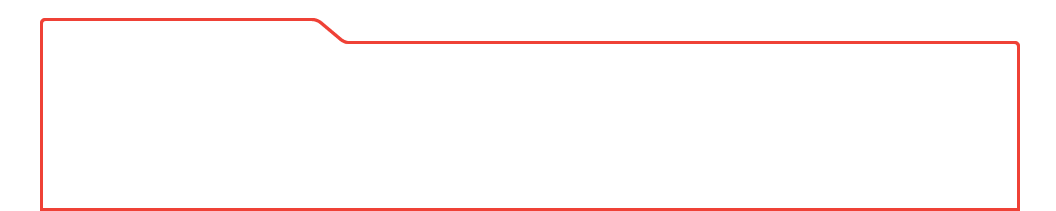
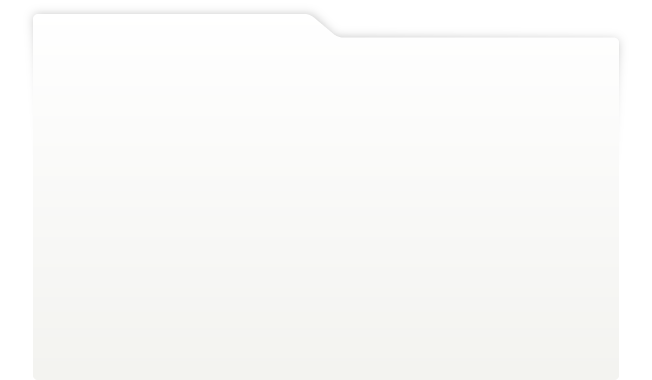
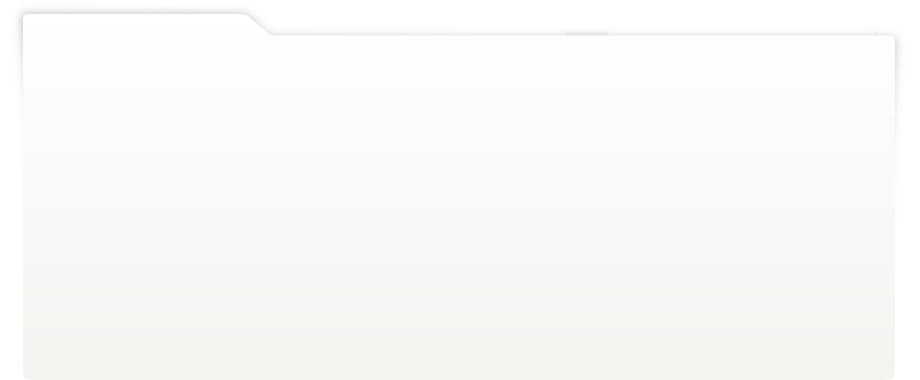
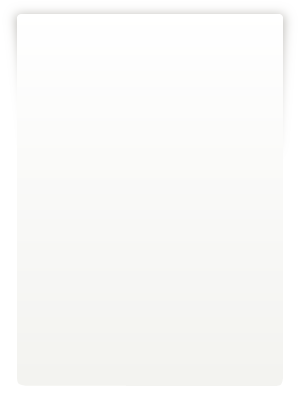
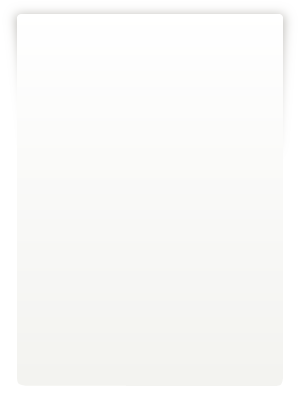
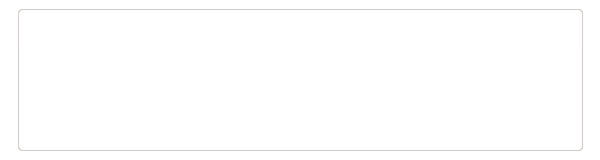
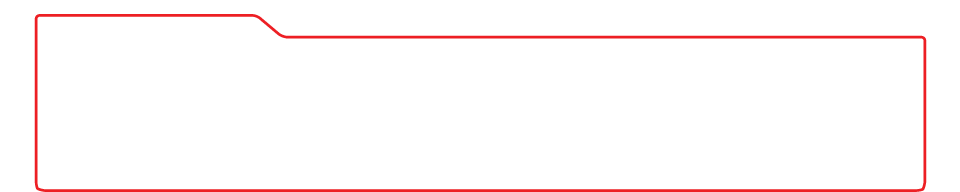
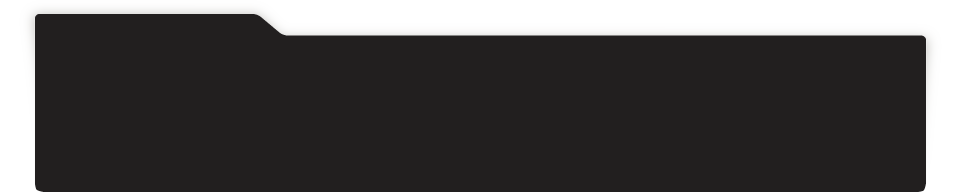
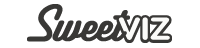
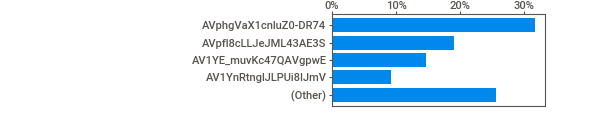
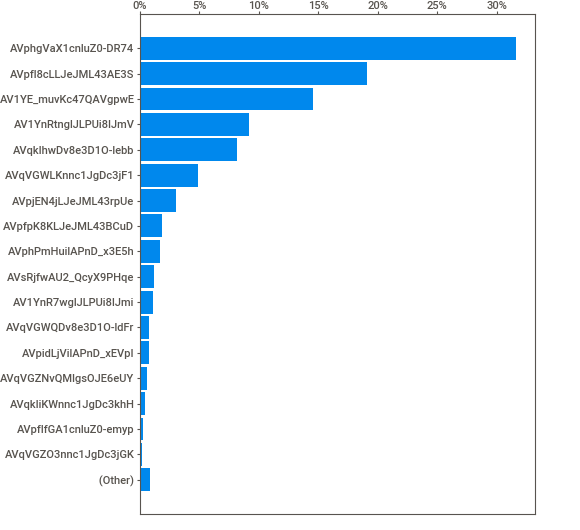
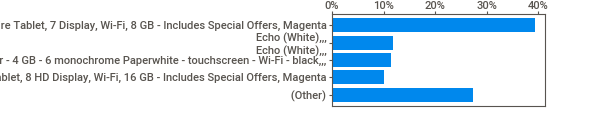
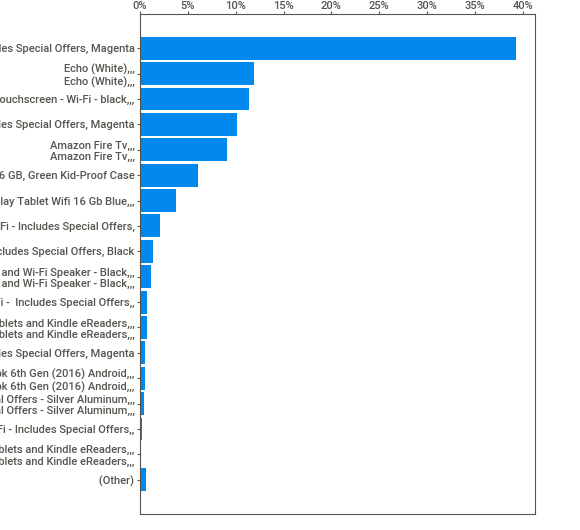
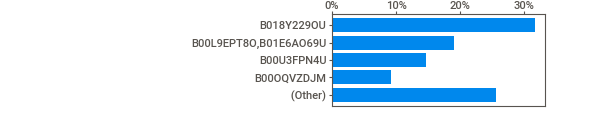
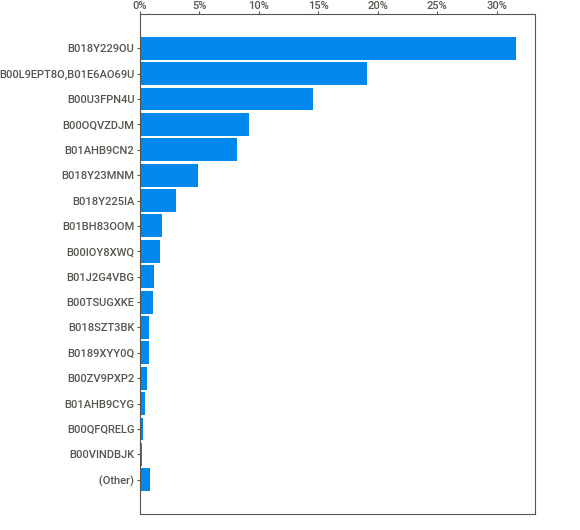
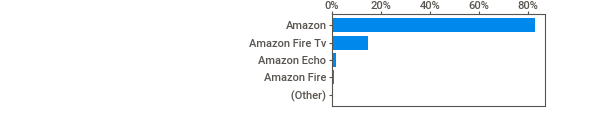
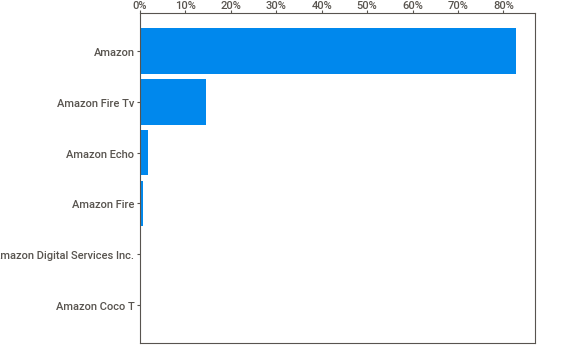
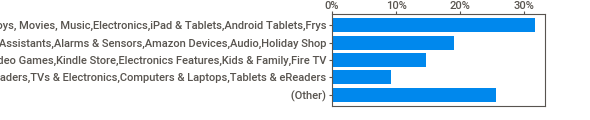
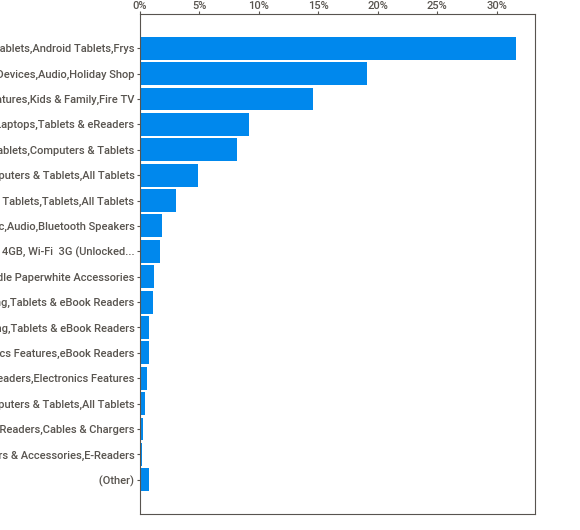
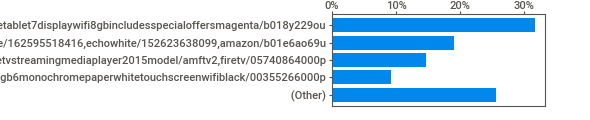
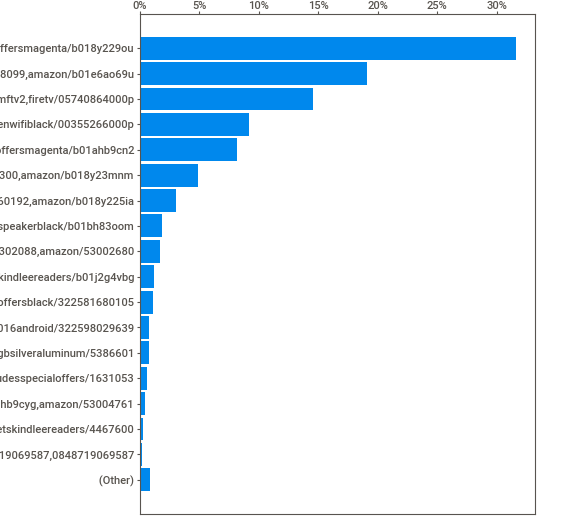
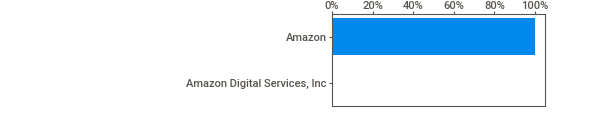
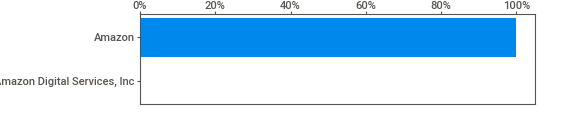
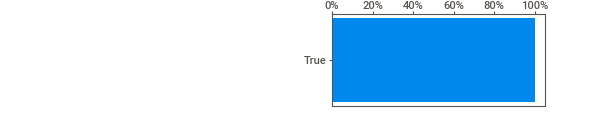
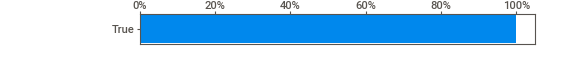
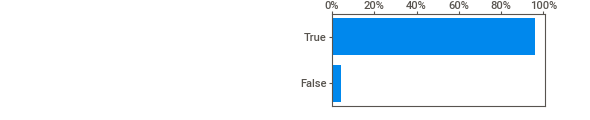
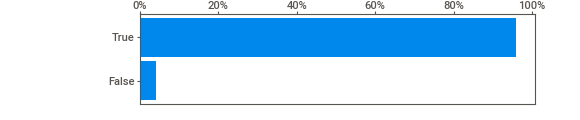
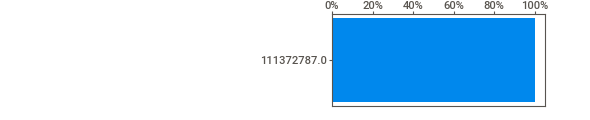
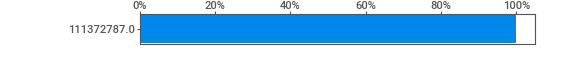
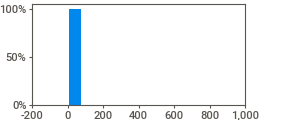
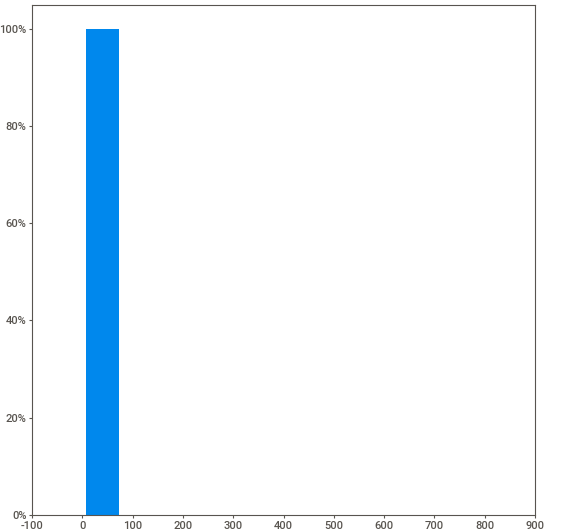
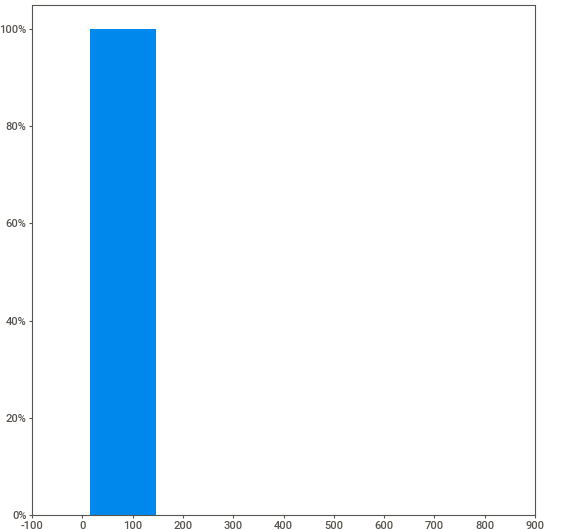
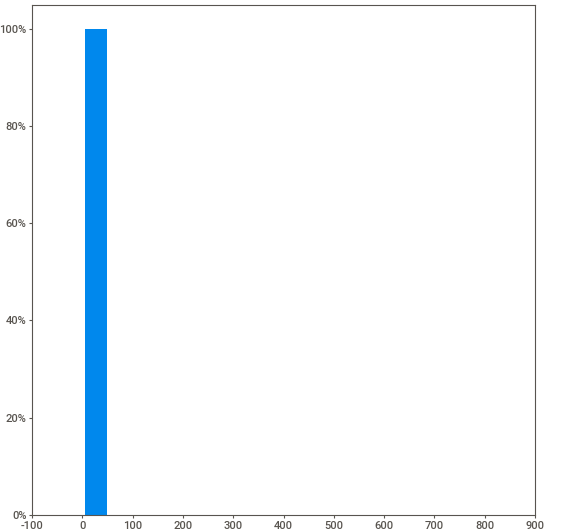
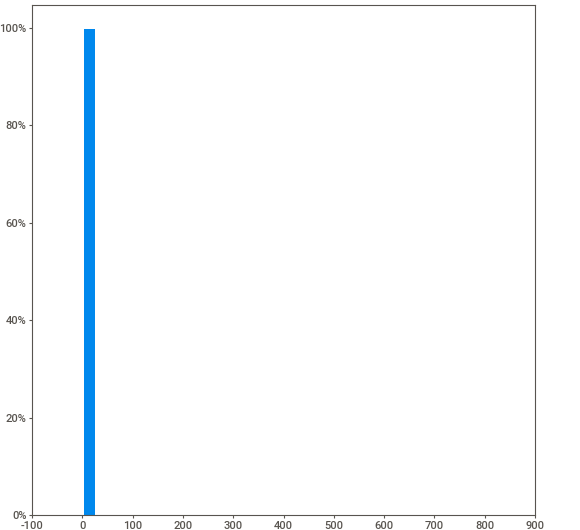
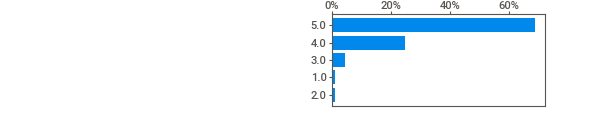
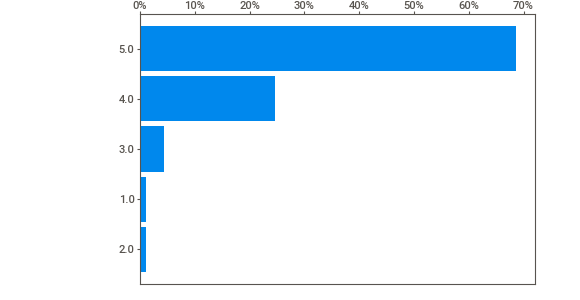
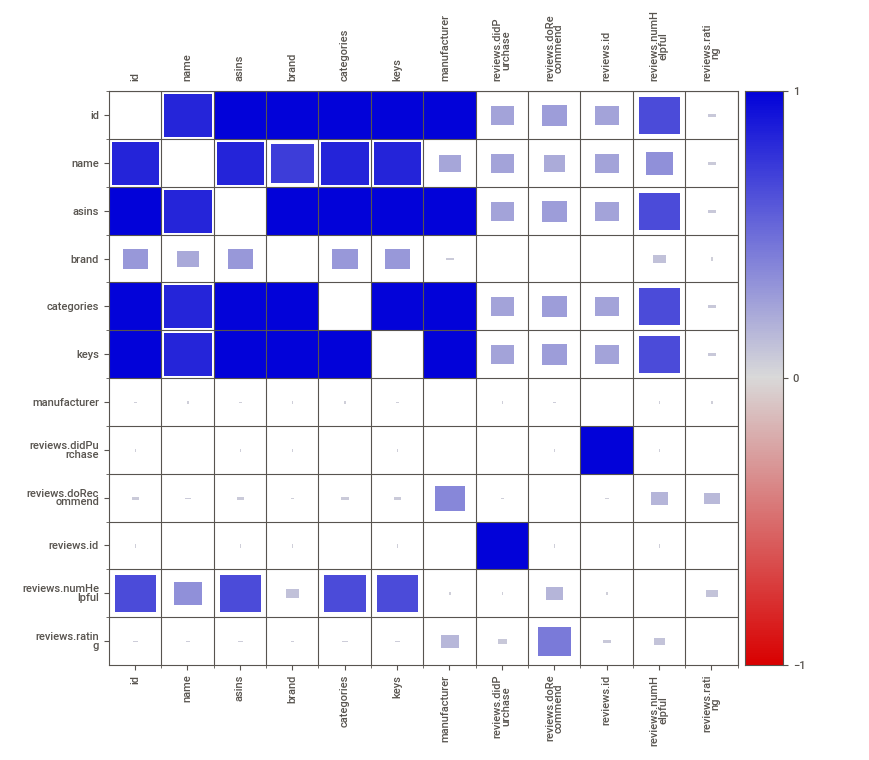
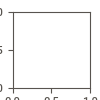

In [23]:
# Displaying the html file in the Google Colab notebook
IPython.display.HTML('SweetViz.html')

From the above EDA, we understand the following:
- reviews.didPurchase, reviews.Id, reviews.userCity, reviews.userProvince
- Name has 20% missing values
- reviews.dateAdded has 31% values missing

<a name="2"></a>
## 2 SpaCy
Back to [Table of Contents](#0)

---


<a name="2"></a>
## 2 Word2Vec
Back to [Table of Contents](#0)

---


<a name="2"></a>
## 2 NGram
Back to [Table of Contents](#0)

---
